# This lecture was assisted by ChatGPT.  
Most of the code, and most of the interpertation was generated by ChatGTP.  I tried to leave the exact input and output to what I asked it. However....... 

### **You cannot blindly follow what ChatGPT does** 
* ChatGPT made a huge mistake in the example below (I left it in to see if yall can see it too).  
* Without knowing what it was doing, would LOOK fine, but very very wrong.  
* Gotta be careful when you use ChatGPT.  When it is wrong, it sounds very right. 

Here is a story of a lawyer that did blindly follow ChatGPT and it made up mad fake stuff, he asked it if it was fake or not and it said, nahh they real.  He used them in court and got in crazy trouble. 

* Forbes - [Lawyer Used ChatGPT In Court—And Cited Fake Cases. A Judge Is Considering Sanctions](https://www.forbes.com/sites/mollybohannon/2023/06/08/lawyer-used-chatgpt-in-court-and-cited-fake-cases-a-judge-is-considering-sanctions/?sh=15e02fe47c7f)
* NYT - [The ChatGPT Lawyer Explains Himself](https://www.nytimes.com/2023/06/08/nyregion/lawyer-chatgpt-sanctions.html)


In [2]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 


%matplotlib inline


In [3]:
# # Load data
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Feature interpretation using our model. How do we explain what's important to survival.  
The only real difference we do here is a few things. 
1. We scale the data first. 
2. We use a different library for the model because it gives use a great summary report. 
3. We focus on the coefficients. 

### Normalizing aka Scaling our data before we feed it into the model.  

```Prompt into ChatGPT:  "can you explain to me in why we do standard scaling before feeding the data into our model. and what stanrdard scaling does and make it in makrdown format so i can paste it into my jupyter notebook."```

Below is ChatGPT's output:
--- 

Of course! Here's the explanation in Markdown format:

### What is Standard Scaling?

Standard scaling is a preprocessing technique used to transform data so that it has a mean (µ) of 0 and a standard deviation (σ) of 1. Mathematically, for each data point \(x\), the transformed point \(z\) is calculated as:

\[ z = \frac{x - µ}{σ} \]

Where:
- \( x \) is the original data point.
- \( µ \) is the mean of the dataset.
- \( σ \) is the standard deviation of the dataset.

---

### Why do we use Standard Scaling?

1. **Feature Magnitude**: 
    - Many algorithms, especially those that rely on computing distances or similarities between data points (like k-means clustering or k-NN), are sensitive to the scales of features. 
    - If one feature has values in the range 0-1 and another in the range 0-1000, the algorithm might be overly influenced by the larger scale feature. 
    - Standard scaling mitigates this by bringing all features to a similar scale.

2. **Model Convergence**: 
    - For optimization algorithms like gradient descent (used in neural networks and logistic regression), features on different scales might cause the optimizer to converge slowly or get stuck in local optima. 
    - Scaled features ensure a more uniform gradient, leading to faster convergence.

3. **Assumption of Standardized Features**: 
    - Some algorithms assume that the input features are centered around zero and have similar variances. 
    - For example, Regularization techniques like Lasso and Ridge work better when features are standardized because the penalty terms in these techniques are sensitive to the scales of features.

4. **Interpretability**: 
    - For models that use coefficients, like linear or logistic regression, having standardized features means that the magnitude of coefficients can provide insights into the relative importance of different features (though this approach is somewhat simplistic and other factors should also be considered).

5. **Outliers**: 
    - Standard scaling is sensitive to outliers. An extreme value can shift the mean and especially the standard deviation, making the scaling susceptible to the effects of outliers. 
    - This can be both an advantage (in capturing the effects of outliers) and a disadvantage (in amplifying the effects of outliers).

---

### In Summary:

Standard scaling is a crucial step in preprocessing when you're working with algorithms sensitive to feature scales. It ensures that all features contribute equally to the model's performance, makes optimization more efficient, and can improve the interpretability of some models. However, it's also essential to be aware of the data and any potential outliers, as standard scaling can be sensitive to them.


In [6]:
# THIS CODE WAS GENERATED BY CHAT-GPT 4
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Titanic dataset
#data = pd.read_csv('path_to_titanic.csv')
data = df.copy()

# Simple data cleaning
data.dropna(inplace=True)
data = pd.get_dummies(data, columns=['sex', 'embarked', 'pclass'])


# Features and target variable
X = data[['age', 'fare', 'sex_male', 'pclass_1', 'pclass_2', 'embarked_Q', 'embarked_S']]
y = data['survived']

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


# Zack added this
X_std_df = pd.DataFrame(X_std, columns=['age', 'fare', 'sex_male', 'pclass_2', 'pclass_3', 'embarked_Q', 'embarked_S'])
X_std_df

,age,fare,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S
0,0.152082,-0.100110,-1.033529,0.399043,-0.2997,-0.105409,-1.310121
1,-0.039875,-0.338485,-1.033529,0.399043,-0.2997,-0.105409,0.763288
2,1.175852,-0.354708,0.967559,0.399043,-0.2997,-0.105409,0.763288
3,-2.023430,-0.815672,-1.033529,-2.505993,-0.2997,-0.105409,0.763288
4,1.431795,-0.686543,-1.033529,0.399043,-0.2997,-0.105409,0.763288
...,...,...,...,...,...,...,...
177,0.727953,-0.345640,-1.033529,0.399043,-0.2997,-0.105409,0.763288
178,-0.167846,-0.969053,0.967559,0.399043,-0.2997,-0.105409,0.763288
179,1.303824,0.055566,-1.033529,0.399043,-0.2997,-0.105409,-1.310121
180,-1.063646,-0.641315,-1.033529,0.399043,-0.2997,-0.105409,0.763288


```If you use the titanic data set and use Logistic Regression to predict if someone survived or died and you use, how do you gain information or explain how impactful each variable is for if someone dies or survives?  how do teach this simply in python. i want to show or graph which features are the most important.```

The output was super long, had errors, and small bugs, I fixed it, removed some things and added some things. All in all its like 90% ChatGPT code and 10%. 

* But there was an error i didn't

              precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.76      0.67      0.71        24

    accuracy                           0.65        37
   macro avg       0.63      0.64      0.63        37
weighted avg       0.67      0.65      0.66        37



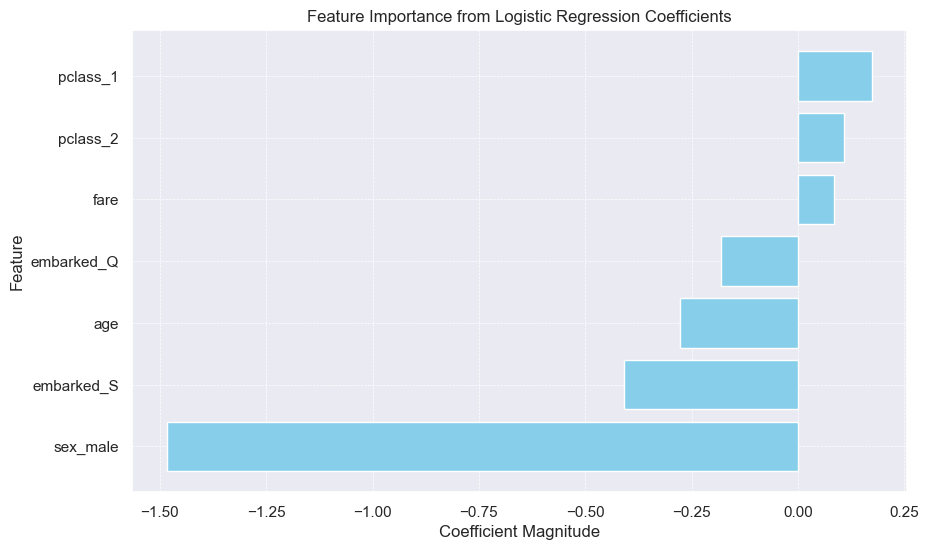

In [7]:
# THIS CODE WAS GENERATED BY CHAT-GPT 4
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Titanic dataset
#data = pd.read_csv('path_to_titanic.csv')
data = df.copy()

# Simple data cleaning
data.dropna(inplace=True)

data = pd.get_dummies(data, columns=['sex', 'embarked', 'pclass'])

# Features and target variable
X = data[['age', 'fare', 'sex_male', 'pclass_1', 'pclass_2', 'embarked_Q', 'embarked_S']]
y = data['survived']

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Helper fuctions to evaluate our model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
y_pred = clf.predict(X_test)


# Zack added this
print(classification_report(y_test, y_pred))

# Extract coefficients
coefs = clf.coef_[0]
features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefs})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [37]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


(891, 5)
(714, 5)
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        87
           1       0.66      0.68      0.67        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.74      0.73      0.74       143



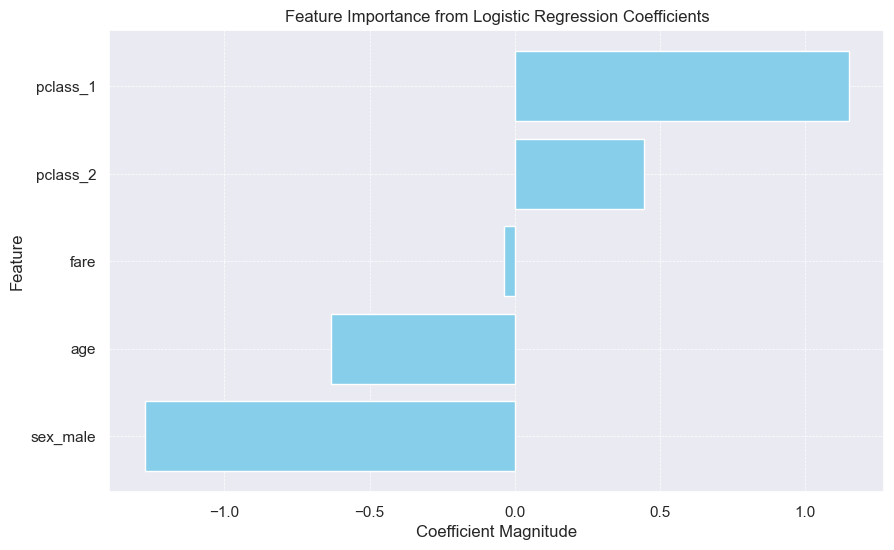

In [9]:
# THIS CODE WAS GENERATED BY CHAT-GPT 4
# MODIFITYED TO REMOVE ERROR AND OTHER BY ZACK

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Titanic dataset
#data = pd.read_csv('path_to_titanic.csv')
data = df.copy()


## Zack added this and fixed the huge drop na mistake.
model_columns = [ 'survived', 'pclass', 'sex', 'age', 'fare']


data = data[model_columns].copy()
print(data.shape)
# Simple data cleaning
data.dropna(inplace=True)
print(data.shape)

data = pd.get_dummies(data, columns=['sex', 'pclass'])

selected_features = ['age', 'fare', 'sex_male', 'pclass_1', 'pclass_2']

# Features and target variable
X = data[selected_features]
y = data['survived']

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)



# Helper fuctions to evaluate our model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
y_pred = clf.predict(X_test)


# Zack added this
print(classification_report(y_test, y_pred))

# Extract coefficients
coefs = clf.coef_[0]
features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefs})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


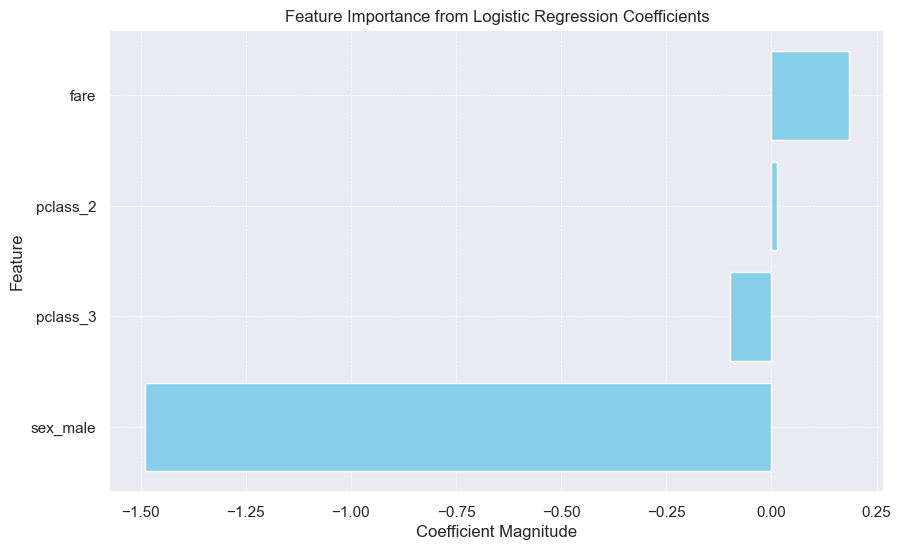

In [10]:
# THIS CODE WAS GENERATED BY CHAT-GPT 4
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Titanic dataset
#data = pd.read_csv('path_to_titanic.csv')
data = df.copy()

# Simple data cleaning
data.dropna(inplace=True)
data = pd.get_dummies(data, columns=['sex', 'embarked', 'pclass'], drop_first=True)

selected_features = ['fare', 'pclass_2', 'pclass_3', 'sex_male']
# Features and target variable
X = data[selected_features]
y = data['survived']

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)


# Extract coefficients
coefs = clf.coef_[0]
features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefs})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


/Users/zacharydesario/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


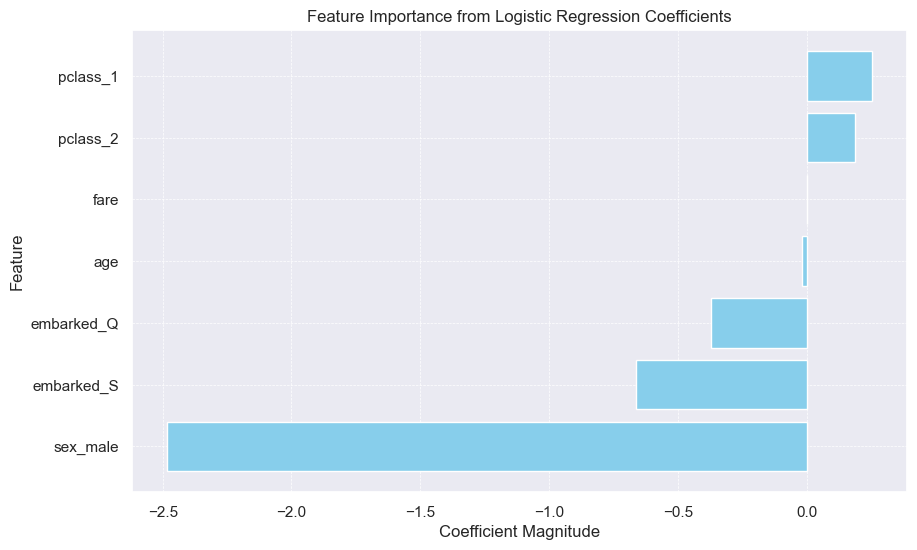

In [86]:
# Just using our variables we used in class
# THIS CODE WAS GENERATED BY CHAT-GPT 4

#### NOT USING STANDARD SCALAR
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Titanic dataset
#data = pd.read_csv('path_to_titanic.csv')
data = df.copy()

# Simple data cleaning
data.dropna(inplace=True)
data = pd.get_dummies(data, columns=['sex', 'embarked', 'pclass'])

# Features and target variable
X = data[['age', 'fare', 'sex_male', 'pclass_1', 'pclass_2', 'embarked_Q', 'embarked_S']]
y = data['survived']

# Standardizing the features
scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Extract coefficients
coefs = clf.coef_[0]
features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefs})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### Using stats models to infer statistical signifiance of the impact of our variables. 


In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# THIS CODE WAS GENERATED BY CHAT-GPT 4
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Titanic dataset
#data = pd.read_csv('path_to_titanic.csv')
data = df.copy()


# ZACK ERROR FIX
model_columns = [ 'survived', 'pclass', 'sex', 'age', 'fare']

data = data[model_columns].copy()
print(data.shape)
# Simple data cleaning
data.dropna(inplace=True)
print(data.shape)

data = pd.get_dummies(data, columns=['sex', 'pclass'])

selected_features = ['age', 'fare', 'sex_male', 'pclass_1', 'pclass_2']

# Features and target variable
X = data[selected_features]
y = data['survived']

# Without this we get an error 
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std_df = pd.DataFrame(X_std, columns=selected_features)

# Add a constant (intercept) to the features matrix
X_const = sm.add_constant(X_std_df)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y, X_const)
result = model.fit()

print(result.summary())


(891, 5)
(714, 5)
Optimization terminated successfully.
         Current function value: 0.453242
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 Sep 2023   Pseudo R-squ.:                  0.3290
Time:                        18:43:26   Log-Likelihood:                -323.61
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.919e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5211      0.100     -5.223      0.000      -0.717      -0.326
age        

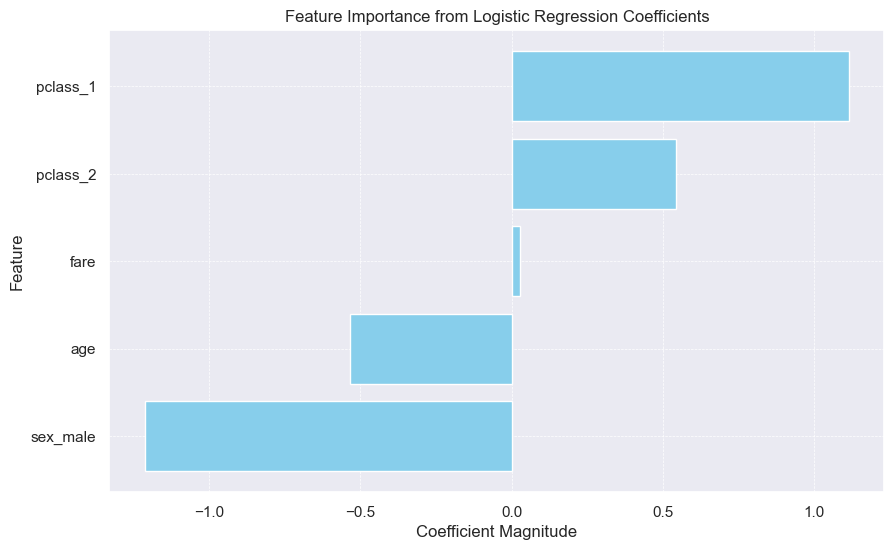

In [12]:
coefficients = result.params[1:]
coefficients

features = X.columns

# Create a DataFrame for coefficients and features
coef_df = pd.DataFrame({'features': features, 'coefficients': coefficients})
coef_df = coef_df.sort_values(by='coefficients')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['features'], coef_df['coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()





## Input prompt 

## MY PROMPT TO CHAT GPT
```
using this logistic regression results summary below for predicting survival in the titanic dataset.  tell me which features are most important and why.  please provide your output in markdown format so i can paste it into my jupyter notebook.


 Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Sep 2023   Pseudo R-squ.:                  0.3290
Time:                        21:23:12   Log-Likelihood:                -323.61
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.919e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5211      0.100     -5.223      0.000      -0.717      -0.326
age           -0.5332      0.112     -4.750      0.000      -0.753      -0.313
fare           0.0276      0.119      0.231      0.817      -0.206       0.262
sex_male      -1.2129      0.100    -12.096      0.000      -1.409      -1.016
pclass_1       1.1155      0.144      7.754      0.000       0.834       1.397
pclass_2       0.5420      0.105      5.159      0.000       0.336       0.748
==============================================================================
``````  

# FULL COPY FROM CHAT GTP.
Of course, here's the explanation in markdown format:

---

## Analysis of Logistic Regression Results:

To determine the importance of features in a logistic regression model, we often consider the following:

1. **Coefficients (coef)**: 
    - These provide the log odds. The larger the absolute value of the coefficient, the stronger the relationship between the feature and the dependent variable (`survived`, in this context). A positive coefficient indicates that the odds of survival increase as the feature increases, while a negative coefficient indicates the opposite.
   
2. **Z-score**: 
    - This indicates how many standard deviations a coefficient is from 0. A higher absolute z-score suggests a more significant relationship between the feature and the dependent variable.
   
3. **P-value (P>|z|)**: 
    - A smaller p-value indicates that the feature is statistically significant in predicting the outcome. Typically, p-values less than 0.05 are considered statistically significant.

From the summary:

1. **sex_male**: 
    - **Coef**: -1.2129
    - **Z**: -12.096
    - **P-value**: < 0.000
    - **Implication**: The negative coefficient implies being male significantly decreases the odds of survival. It has the highest absolute z-value, suggesting it's the most significant predictor in the model.

2. **pclass_1**: 
    - **Coef**: 1.1155
    - **Z**: 7.754
    - **P-value**: < 0.000
    - **Implication**: Being in first class (`pclass_1`) significantly increases the odds of survival. Its z-value is high, signifying its importance.

3. **pclass_2**: 
    - **Coef**: 0.5420
    - **Z**: 5.159
    - **P-value**: < 0.000
    - **Implication**: Being in the second class (`pclass_2`) also increases the odds of survival but not as much as the first class.

4. **age**: 
    - **Coef**: -0.5332
    - **Z**: -4.750
    - **P-value**: < 0.000
    - **Implication**: Age has a negative relationship with survival, meaning as age increases, the odds of survival decrease.

5. **fare**: 
    - **Coef**: 0.0276
    - **Z**: 0.231
    - **P-value**: 0.817
    - **Implication**: Fare has a weak positive relationship with survival, but given its high p-value, it's not statistically significant.

### Conclusion:

- **Most Important Feature**: `sex_male` is the most important due to its highest absolute coefficient and z-value.
- **Next in Line**: `pclass_1` and `pclass_2` are also crucial given their significant coefficients and z-values.
- **Least Important Feature**: `fare` is the least important since it's not statistically significant.

The order of importance based on the coefficients' magnitude and significance is: `sex_male`, `pclass_1`, `pclass_2`, `age`, and then `fare`.

---

In [80]:
data = df.copy()

model_columns = [ 'survived', 'pclass', 'sex', 'age', 'fare']

data = data[model_columns].copy()
print(data.shape)
# Simple data cleaning
data.dropna(inplace=True)
print(data.shape)

data.groupby('pclass')['fare'].agg(['mean', 'min', 'max', 'std', 'median'])

(891, 5)
(714, 5)


,mean,min,max,std,median
pclass,,,,,
1,87.961582,0.0,512.3292,80.857189,69.3000
2,21.471556,10.5,73.5000,13.187429,15.0458
3,13.229435,0.0,56.4958,10.043158,8.0500


## MY PROMPT TO CHAT GPT
```
using this logistic regression results summary below for predicting survival in the titanic dataset.  tell me which features are most important and why.  
 Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Sep 2023   Pseudo R-squ.:                  0.3290
Time:                        21:23:12   Log-Likelihood:                -323.61
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.919e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5211      0.100     -5.223      0.000      -0.717      -0.326
age           -0.5332      0.112     -4.750      0.000      -0.753      -0.313
fare           0.0276      0.119      0.231      0.817      -0.206       0.262
sex_male      -1.2129      0.100    -12.096      0.000      -1.409      -1.016
pclass_1       1.1155      0.144      7.754      0.000       0.834       1.397
pclass_2       0.5420      0.105      5.159      0.000       0.336       0.748
==============================================================================
``````

--
# Chat gpt's response... 

To determine which features are most important in this logistic regression model predicting survival on the Titanic, we can look at the following:

1. **Coefficient Values (coef)**: A higher absolute value of the coefficient means that the feature has a stronger effect on the prediction. A positive coefficient increases the log odds of the response (and thus increases the probability), and a negative coefficient decreases the log odds of the response (and thus decreases the probability).

2. **P-values (P>|z|)**: This tells us if the variable is significant in predicting the response. A smaller p-value indicates that you can reject the null hypothesis, meaning the predictor variable is statistically significant. A commonly used threshold is 0.05. If the p-value is less than this threshold, then the predictor is considered significant.

Let's analyze:

- **age**: 
  - coef = -0.5332: It's a negative coefficient, meaning as age increases, the odds of survival decrease.
  - P-value = 0.000: It's less than 0.05, so age is statistically significant.
  
- **fare**: 
  - coef = 0.0276: It's a positive coefficient but very small, meaning fare has a slight positive effect on survival, but the effect is not strong.
  - P-value = 0.817: It's much larger than 0.05, indicating fare is not statistically significant in predicting survival.
  
- **sex_male**: 
  - coef = -1.2129: It's a negative coefficient, suggesting males have lower odds of survival compared to females.
  - P-value = 0.000: It's statistically significant.
  
- **pclass_2**:
  - coef = -0.5470: Passengers in 2nd class have lower odds of survival compared to those in 1st class.
  - P-value = 0.000: It's statistically significant.
  
- **pclass_3**: 
  - coef = -1.2708: Passengers in 3rd class have even lower odds of survival compared to those in 1st class (and lower than 2nd class too, since the absolute coefficient value is higher).
  - P-value = 0.000: It's statistically significant.

### Summary:

Based on the coefficients' absolute values and their respective p-values:

1. **sex_male** is the most important predictor in the model, with males having significantly lower odds of survival than females.
2. **pclass_3** is the next important, with passengers in the third class having much lower odds of survival compared to those in the first class.
3. **age** is also a significant predictor, with older passengers having lower odds of survival.
4. **pclass_2** also plays a role, where second class passengers have lower odds compared to those in the first class, but still better than the third class.
5. **fare**, despite being included in the model, does not significantly predict survival based on its high p-value. 

The features are thus ranked in importance as: `sex_male`, `pclass_3`, `age`, `pclass_2`, and then `fare`.